**Exercise 8.11**  Exhibit 6.31 on page 139, suggested specifying either an AR(1) or possibly an AR(4) model for the difference of the logarithms of the oil price series. (The filename is `oil.price`).

**(a)** Estimate both of these models using maximum likelihood and compare the results using the diagnostic tests considered in this chapter.

**(b)** Exhibit 6.32 on page 140, suggested specifying an MA(1) model for the difference of the logs. Estimate this model by maximum likelihood and perform the diagnostic tests considered in this chapter.

**(c)** Which of the three models AR(1), AR(4), or MA(1) would you prefer given the results of parts (a) and (b)?

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import chi2, shapiro

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_acf_with_bounds(acf, lower, upper, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.fill_between(k, lower, upper, color='C0', alpha=0.2)

    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')    
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()
    
def plot_residuals_acf(resid, title, nlags=15):
    r = acf(resid, fft=False, nlags=nlags)[1:]
    se = 1 / np.sqrt(len(resid))
    plot_acf_with_bounds(r, -2*se, 2*se, title=title)

In [3]:
def ljung_box_test(r, n, k_ar=0, k_ma=0):
    nlags = len(r)
    denominators = np.arange(n-1, n-1-nlags, step=-1)
    Qstar = n * (n-2) * np.sum(r**2 / denominators)
    df = nlags - k_ar - k_ma
    p_value = 1 - chi2.cdf(Qstar, df=df)
    
    return {
        'X-squared': Qstar,
        'df': df,
        'p-value': p_value
    }

In [4]:
Y = pd.read_csv('../data/oil.price.dat')['oil.price']
Y = np.diff(np.log(Y))

In [5]:
model_ar1 = ARIMA(Y, order=(1, 0, 0)).fit(method='mle')
model_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(1, 0)   Log Likelihood                 258.717
Method:                           mle   S.D. of innovations              0.082
Date:                Tue, 12 May 2020   AIC                           -511.434
Time:                        14:13:19   BIC                           -500.992
Sample:                             0   HQIC                          -507.227
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.007      0.575      0.565      -0.010       0.018
ar.L1.y        0.2337      0.066      3.536      0.000       0.104       0.363
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.2788           +0.0000j            4.2788            0.0000
-----------------------------------------------------------------------------
"""

In [6]:
model_ar4 = ARIMA(Y, order=(4, 0, 0)).fit(method='mle')
model_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(4, 0)   Log Likelihood                 262.161
Method:                           mle   S.D. of innovations              0.081
Date:                Tue, 12 May 2020   AIC                           -512.321
Time:                        14:13:19   BIC                           -491.438
Sample:                             0   HQIC                          -503.907
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.005      0.837      0.403      -0.006       0.015
ar.L1.y        0.2638      0.067      3.942      0.000       0.133       0.395
ar.L2.y       -0.1583      0.069     -2.292      0.022      -0.294      -0.023
ar.L3.y        0.0203      0.069      0.293      0.770      -0.115       0.156
ar.L4.y       -0.1008      0.068     -1.480      0.139      -0.234       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1461           -1.1905j            1.6525           -0.1280
AR.2            1.1461           +1.1905j            1.6525            0.1280
AR.3           -1.0456           -1.5938j            1.9061           -0.3424
AR.4           -1.0456           +1.5938j            1.9061            0.3424
-----------------------------------------------------------------------------
"""

AR(4) presents a lower AIC, but the coefficients for $\phi_3$ and $\phi_4$ are not significant in the AR(4) model.  Let's try an AR(2) model:

In [7]:
model_ar2 = ARIMA(Y, order=(2, 0, 0)).fit(method='mle')
model_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(2, 0)   Log Likelihood                 261.071
Method:                           mle   S.D. of innovations              0.082
Date:                Tue, 12 May 2020   AIC                           -514.142
Time:                        14:13:19   BIC                           -500.220
Sample:                             0   HQIC                          -508.532
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.006      0.731      0.465      -0.007       0.016
ar.L1.y        0.2603      0.067      3.908      0.000       0.130       0.391
ar.L2.y       -0.1469      0.067     -2.181      0.029      -0.279      -0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8858           -2.4537j            2.6087           -0.1949
AR.2            0.8858           +2.4537j            2.6087            0.1949
-----------------------------------------------------------------------------
"""

Let's also look at the MA(1) model:

In [8]:
model_ma1 = ARIMA(Y, order=(0, 0, 1)).fit(method='mle')
model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(0, 1)   Log Likelihood                 260.468
Method:                           mle   S.D. of innovations              0.082
Date:                Tue, 12 May 2020   AIC                           -514.936
Time:                        14:13:19   BIC                           -504.494
Sample:                             0   HQIC                          -510.729
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.007      0.595      0.552      -0.009       0.017
ma.L1.y        0.2939      0.070      4.226      0.000       0.158       0.430
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.4025           +0.0000j            3.4025            0.5000
-----------------------------------------------------------------------------
"""

Coefficients are also significant, and this model presents the smallest AIC.

Let's look at the residuals ACF for each model:

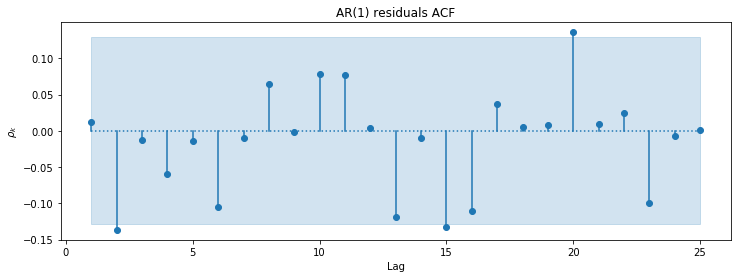

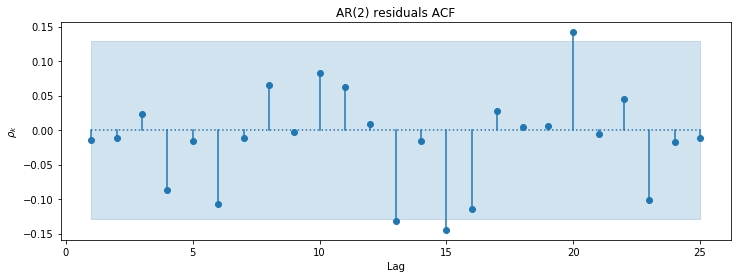

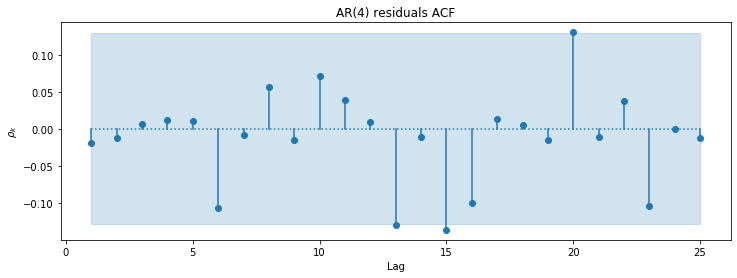

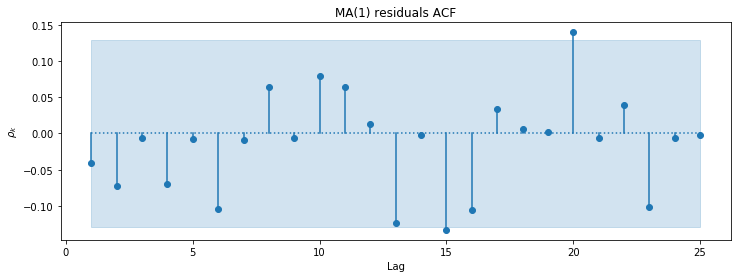

In [9]:
plot_residuals_acf(model_ar1.resid, 'AR(1) residuals ACF', nlags=25)
plot_residuals_acf(model_ar2.resid, 'AR(2) residuals ACF', nlags=25)
plot_residuals_acf(model_ar4.resid, 'AR(4) residuals ACF', nlags=25)
plot_residuals_acf(model_ma1.resid, 'MA(1) residuals ACF', nlags=25)

Residuals for the AR(1) model display significant autocorrelation at lag 2.  This is not the issue for all other models.  Residuals do appear to present significant autocorrelation at lags 13, 15, and 20 in all models.

In [10]:
models = [
    {'name': 'AR(1)', 'model': model_ar1, 'k_ar': 1, 'k_ma': 0},
    {'name': 'AR(2)', 'model': model_ar2, 'k_ar': 2, 'k_ma': 0},
    {'name': 'AR(4)', 'model': model_ar4, 'k_ar': 4, 'k_ma': 0},
    {'name': 'MA(1)', 'model': model_ma1, 'k_ar': 0, 'k_ma': 1},
]

for m in models:
    res = ljung_box_test(r=acf(m['model'].resid, fft=False, nlags=12)[1:], n=len(Y), k_ar=m['k_ar'], k_ma=m['k_ma'])
    print(m['name'], res)

AR(1) {'X-squared': 12.226203136717597, 'df': 11, 'p-value': 0.3468827464001606}
AR(2) {'X-squared': 8.655069443291948, 'df': 10, 'p-value': 0.5651213347208631}
AR(4) {'X-squared': 5.527952129752027, 'df': 8, 'p-value': 0.6999412037710242}
MA(1) {'X-squared': 9.267658459397873, 'df': 11, 'p-value': 0.5972011680510516}


Residuals do not appear to collectively display too much autocorrelation in any of the models.

In [11]:
for m in models:
    print(m['name'] + ' Shapiro-Wilk p-value: ', shapiro(m['model'].resid)[1])

AR(1) Shapiro-Wilk p-value:  1.2860200513387099e-05
AR(2) Shapiro-Wilk p-value:  2.0121793568250723e-05
AR(4) Shapiro-Wilk p-value:  2.3066428184392862e-05
MA(1) Shapiro-Wilk p-value:  1.7934182324097492e-05


Shapiro-Wilk p-value rejects normality on residuals for all models, however -- indicating there are more patterns not captured.

Based on these results, we'd select the MA(1) model for the difference of log prices -- keeping in mind that more modeling may be needed to achieve residual normality.